In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

#MCLP
from mclp import *
%matplotlib inline

# 파일 이름과 경로 지정
park_file = 'park.csv'
market_file = 'market.csv'
culture_file = 'center.csv'
school_file = 'school.csv'
busstop_file = 'bus.csv'

df = pd.read_csv('Variables for Clustering ver2.csv', encoding='euc-kr')

# csv 파일 읽어오기
park_data = pd.read_csv(park_file)
market_data = pd.read_csv(market_file)
culture_data = pd.read_csv(culture_file)
school_data = pd.read_csv(school_file)
busstop_data = pd.read_csv(busstop_file)

# 필요한 데이터만 추출
park_location = park_data[['위도', '경도']].values
market_location = market_data[['위도', '경도']].values
culture_location = culture_data[['위도', '경도']].values
school_location = school_data[['위도', '경도']].values
busstop_location = busstop_data[['위도', '경도']].values

# 가중치 적용하여 데이터프레임 만들기
park_weight = 0.992
market_weight = 0.916
culture_weight = 0.708
school_weight = 0.1
busstop_weight = 0.002

park_weighted = np.column_stack((park_location, np.full(len(park_location), park_weight)))
market_weighted = np.column_stack((market_location, np.full(len(market_location), market_weight)))
culture_weighted = np.column_stack((culture_location, np.full(len(culture_location), culture_weight)))
school_weighted = np.column_stack((school_location, np.full(len(school_location), school_weight)))
busstop_weighted = np.column_stack((busstop_location, np.full(len(busstop_location), busstop_weight)))

total_weighted = np.vstack((park_weighted, market_weighted, culture_weighted, school_weighted, busstop_weighted))

# 군집화
gmm = GaussianMixture(n_components=400, random_state=0).fit(total_weighted)

# 중심점의 위치 데이터 출력

centers = gmm.means_[:, :2]
print(centers)

[[ 37.53579372 126.85511131]
 [ 37.5428681  126.8441146 ]
 [ 37.56049864 126.84966334]
 [ 37.56398685 126.81109316]
 [ 37.55252217 126.84962353]
 [ 37.56215945 126.85269723]
 [ 37.5579702  126.8689817 ]
 [ 37.55959177 126.82640367]
 [ 37.54917049 126.83104695]
 [ 37.54842536 126.87630891]
 [ 37.54690486 126.8438975 ]
 [ 37.58020629 126.81564251]
 [ 37.55379057 126.81816426]
 [ 37.56831813 126.80634048]
 [ 37.570733   126.82186639]
 [ 37.56542931 126.8418149 ]
 [ 37.55634606 126.76903555]
 [ 37.54063887 126.86217429]
 [ 37.57339439 126.81239495]
 [ 37.53324767 126.83840288]
 [ 37.56047015 126.84517498]
 [ 37.58128422 126.79838216]
 [ 37.57904996 126.8138119 ]
 [ 37.56074506 126.86693646]
 [ 37.55875119 126.85448014]
 [ 37.57223174 126.83870976]
 [ 37.55077461 126.82471992]
 [ 37.53692049 126.84955426]
 [ 37.5473042  126.8733012 ]
 [ 37.5630013  126.8091012 ]
 [ 37.55965083 126.80349421]
 [ 37.5632     126.81626   ]
 [ 37.5501321  126.85034017]
 [ 37.53937802 126.86332834]
 [ 37.57522768

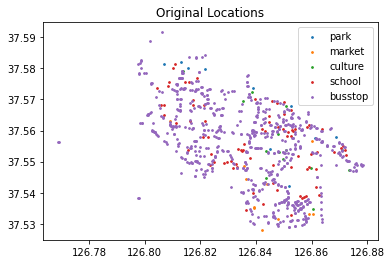

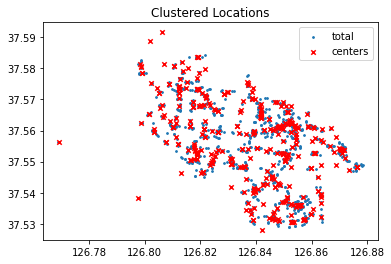

In [ ]:
# 원본 위치 데이터 시각화
plt.scatter(park_location[:, 1], park_location[:, 0], s=3, label='park')
plt.scatter(market_location[:, 1], market_location[:, 0], s=3, label='market')
plt.scatter(culture_location[:, 1], culture_location[:, 0], s=3, label='culture')
plt.scatter(school_location[:, 1], school_location[:, 0], s=3, label='school')
plt.scatter(busstop_location[:, 1], busstop_location[:, 0], s=3, label='busstop')
plt.legend()
plt.title('Original Locations')
plt.show()

# 군집화된 위치 데이터 시각화
plt.scatter(total_weighted[:, 1], total_weighted[:, 0], s=3, label='total')
plt.scatter(centers[:, 1], centers[:, 0], s=20, c='r', marker='x', label='centers')
plt.legend()
plt.title('Clustered Locations')
plt.show()

----- Configurations -----
  Number of points 400
  K 100
  Radius 0.000450755
  M 1000
----- Output -----
  Running time : 0.19198393821716309 seconds
  Optimal coverage points: 53

MCLP 결과 좌표
37.53425985457823 126.8155379722532
37.55442546447067 126.84375339757366
37.53676800906762 126.85170541340285
37.573169151754925 126.79229631032389
37.5620531706046 126.81058821907101
37.56629558031234 126.79923688662109
37.571440333188846 126.79715827531315
37.5665002145618 126.8392236686104
37.558297967677454 126.79380746117293
37.568358929295066 126.82321248271606
37.53556963886797 126.83154197566522
37.58266454228356 126.81657468036991
37.53496617361822 126.8417854104054
37.57610947600813 126.81948599597611
37.57023868862471 126.81839802655914
37.57722598351384 126.79168005537481
37.54333259108039 126.80784743981931
37.5501803542122 126.82160691236959
37.542262825705286 126.83744594356028
37.55552900832144 126.83527544466729
37.556384499168544 126.83532916307857
37.56472046794296 126.8532829

37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.571440333188846 126.79715827531315
37.5665002145618 126.8392236686104
37.5665002145618 126.8392236686104
37.5665002145618 1

37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.53496617361822 126.8417854104054
37.57610947600813 126.81948599597611
37.57610947600813 126.81948599597611
37.57610947600813 126.81948599597611
37.57610947600813 126.81948599597611
37.57610947600813 126.81

37.55552900832144 126.83527544466729
37.55552900832144 126.83527544466729
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.556384499168544 126.83532916307857
37.55638449916

37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
37.55647088403739 126.82139255332427
3

37.54023713758205 126.82139878915191
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
37.567488394817026 126.8185889571627
3

37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
37.55390118171926 126.77329894624913
3

37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.86318515230246
37.5577224767405 126.8631851

37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
37.54655210692052 126.80552859080562
3

37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.556957491886365 126.83990159168354
37.5374353623758 126.83054204243012
37.5374353623758 126.83054204243012
37.5374353623758 126.83054204243012
37.5374353623758 1

37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
37.58107375115032 126.81083308374089
3

37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.8595785912721
37.53287489120559 126.859578

37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.8607275570634
37.53448341829927 126.860727

37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
37.53303521854603 126.85285701229908
3

37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
37.56061815172729 126.84669507314781
3

37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
37.56499825342636 126.84135254358011
3

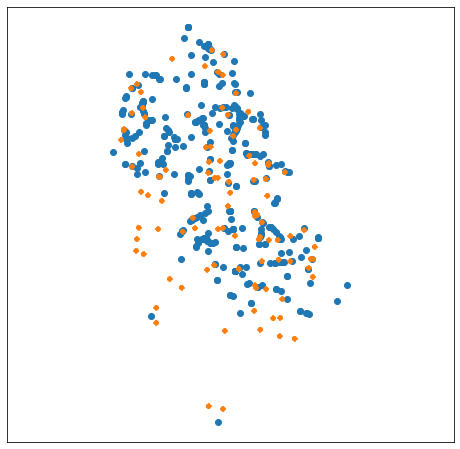

In [ ]:
points = centers

K = 100
radius = 0.00045075501464953804
M = 1000

opt_sites, f = mclp(points, K, radius, M)
plot_result(points, opt_sites, radius)

print("\nMCLP 결과 좌표")
for opt_site in opt_sites:
    print(opt_site[0], opt_site[1])